# **Speech Emotion Recognition**

### **OBJECTIVE : The main goal of this notebook is to build a neural network system which can classify a person's emotion by analysing the patterns in its audio. For that,we'll go through the following steps :**    
- Data collection
- Data preprocessing/Feature extraction
- Exploratory data analysis
- Model training & evaluation

# **Data collection**
For this project we would need a bunch of sample audio files with varying emotional intensities. We'll we use the RAVDESS dataset which contains 1440 files: 60 trials per actor x 24 actors = 1440 audio files .

Speech emotions includes : (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised) The entire dataset is 24.8GB from 24 actors, but we’ll use a dataset with lowered the sample rate on all the files, you can download it from here : https://drive.google.com/file/d/1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7/view


In [44]:
# setting random seed
import random
random.seed(10)

# path of RAVDDESS dataset on drive
dataset_path = r"/content/drive/MyDrive/ravdess-data-SER"

In [45]:
import os
print("List of All Dataset Directories :")
for dir in os.listdir(dataset_path):
  print(dir)

List of All Dataset Directories :
Actor_21
Actor_23
Actor_20
Actor_18
Actor_22
Actor_19
Actor_16
Actor_17
Actor_24
Actor_15
Actor_13
Actor_07
Actor_08
Actor_11
Actor_09
Actor_06
Actor_10
Actor_14
Actor_12
Actor_05
Actor_02
Actor_03
Actor_01
Actor_04


In [46]:
import os
print("Printing names of some Audio Files :")
i=0
for dir in os.listdir(dataset_path):
  audio_files = os.listdir(os.path.join(dataset_path,dir))
  print(audio_files)
  i+=1

  if i==2:
    break


Printing names of some Audio Files :
['03-01-01-01-01-02-21.wav', '03-01-02-02-01-02-21.wav', '03-01-05-02-01-01-21.wav', '03-01-04-02-02-02-21.wav', '03-01-04-01-01-01-21.wav', '03-01-02-01-01-01-21.wav', '03-01-03-02-02-01-21.wav', '03-01-03-01-01-01-21.wav', '03-01-02-01-02-02-21.wav', '03-01-07-01-02-02-21.wav', '03-01-08-01-02-01-21.wav', '03-01-02-01-01-02-21.wav', '03-01-06-02-02-01-21.wav', '03-01-02-02-02-01-21.wav', '03-01-05-02-02-01-21.wav', '03-01-03-02-01-02-21.wav', '03-01-02-02-01-01-21.wav', '03-01-07-01-01-02-21.wav', '03-01-08-01-01-02-21.wav', '03-01-08-02-02-02-21.wav', '03-01-03-01-01-02-21.wav', '03-01-08-02-01-01-21.wav', '03-01-05-01-02-02-21.wav', '03-01-05-02-01-02-21.wav', '03-01-05-02-02-02-21.wav', '03-01-05-01-01-02-21.wav', '03-01-04-02-01-02-21.wav', '03-01-03-02-01-01-21.wav', '03-01-07-02-01-02-21.wav', '03-01-07-02-02-01-21.wav', '03-01-03-01-02-02-21.wav', '03-01-04-02-01-01-21.wav', '03-01-04-01-01-02-21.wav', '03-01-04-01-02-02-21.wav', '03-01-02-

## **1] Data Processing & Feature Extraction**


### **1.1] Extracting features from audio filenames.**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the respective features:

**Filename identifiers :**

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

- Vocal channel (01 = speech, 02 = song).

- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

- Repetition (01 = 1st repetition, 02 = 2nd repetition).

- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

(Filename example: 03-01-06-01-02-01-12.wav)



In [47]:
# Importing required libraries

import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import scale
from librosa.display import waveplot


In [48]:
audio_features = []

for actor_dir in os.listdir(dataset_path):

    audio_files = os.listdir(os.path.join(dataset_path,actor_dir))

    for audio_file in audio_files:

        features = audio_file.split("-")

        modality = features[0]

        vocal_channel = features[1]

        emotion = features[2]
        if emotion =="01":
            emotion = 1
        elif emotion == "02":
            emotion = 2
        elif emotion == "03":
            emotion = 3
        elif emotion == "04":
            emotion = 4
        elif emotion == "05":
            emotion = 5
        elif emotion == "06":
            emotion = 6
        elif emotion == "07":
            emotion = 7
        elif emotion == "08":
            emotion = 8

        emotional_intensity = features[3]
        statement = features[4]
        repetition = features[5]
        filename = os.path.join(dataset_path,actor_dir, audio_file)

        features_ = [filename,modality,vocal_channel,emotion,emotional_intensity,statement,repetition]
        audio_features.append(features_)


audio_features = np.array(audio_features)

column_values = ["filepath","modality","vocal_channel","emotion","emotional_intensity","statement","repetition"]
df = pd.DataFrame(data=audio_features,columns=column_values)

print(df.shape)
df

(1440, 7)


,filepath,modality,vocal_channel,emotion,emotional_intensity,statement,repetition
0,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,1,01,01,02
1,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,2,02,01,02
2,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,5,02,01,01
3,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,4,02,02,02
4,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,4,01,01,01
...,...,...,...,...,...,...,...
1435,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,7,01,01,02
1436,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,8,01,02,02
1437,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,3,02,01,02
1438,/content/drive/MyDrive/ravdess-data-SER/Actor_...,03,01,6,01,01,02


## **2] Exploratory Data Analysis (EDA)**
In this section we'll look into our extracted features and also see how Waveforms,Mel-Spectrograms and MFCC's of various emotions look like.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


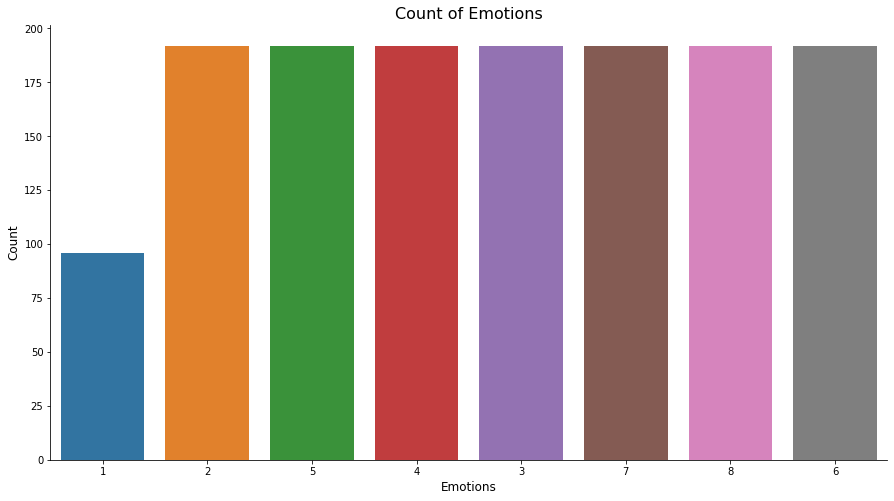

In [49]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15,8))
plt.title('Count of Emotions', size=16)
sns.countplot(df.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show();

**We can also plot waveplots and spectograms for audio signals**

- **Waveplots** - Waveplots let us know the loudness of the audio at a given time.
- **Spectograms** - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [50]:
# Some utility functions to create plots

# Takes audio file name/path & plots its waveform.
def plot_waveform(audio_file):
    plt.figure(figsize=(15,6))
    samples, sample_rate = librosa.load(audio_file, sr=None)
    waveplot(samples, sr=sample_rate, color="r", alpha=0.55)
    plt.title("Amplitude vs Time")
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.show()


# Takes audio file name/path & plots its Mel Spectrogram.
def plot_MelSpectrogram(audio_file):
    plt.figure(figsize=(10,8))
    samples, sample_rate = librosa.load(audio_file, sr=None)
    spectrogram = librosa.stft(samples)
    # use the mel-scale instead of raw frequency
    sgram_mag, _ = librosa.magphase(spectrogram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    # use the decibel scale to get the final Mel Spectrogram
    mel_spectrogram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    # display mel-spectrogram
    librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel Spectrogram")
    plt.show()


def plot_Mfcc(audio_file):
    plt.figure(figsize=(10,8))
    samples, sample_rate = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
    # Center MFCC coefficient dimensions to the mean and unit variance
    mfcc = scale(mfcc, axis=1)
    librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
    plt.title("MFCC Spectrogram")
    plt.show()


# plots waveform,mel spec and mfcc for given audio
def plot_all(audio_file):
    plot_waveform(audio_file)
    plot_MelSpectrogram(audio_file)
    plot_Mfcc(audio_file)


### **Ploting Waveplots for "NEUTRAL" emotion signal**

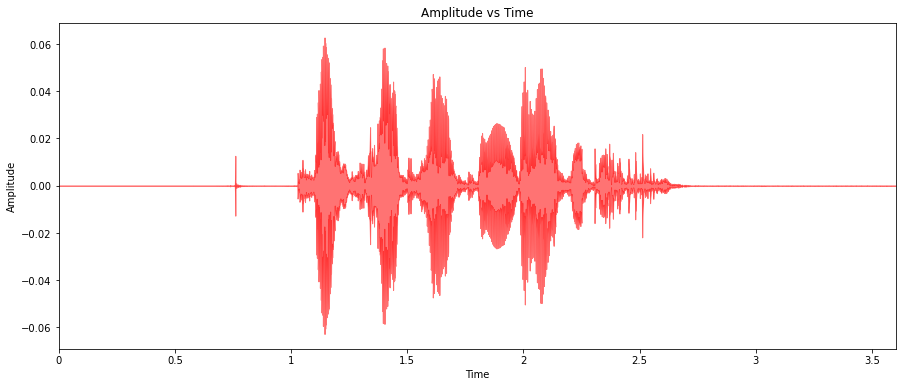

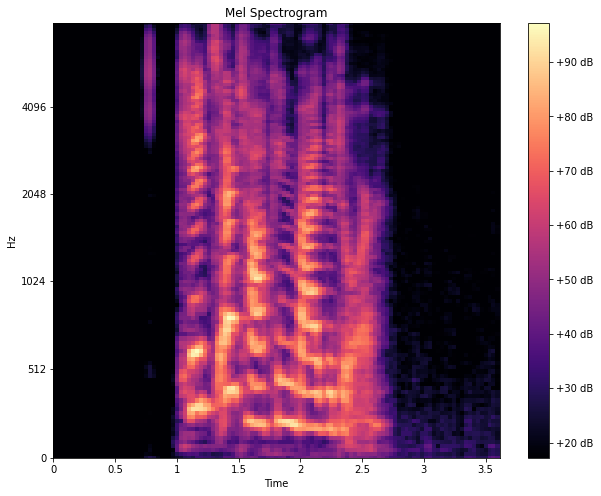

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


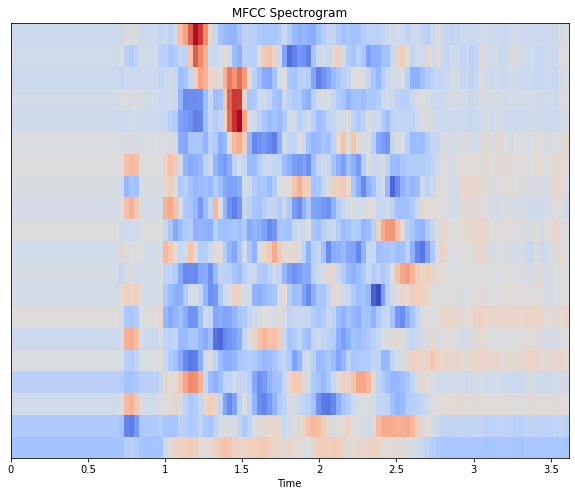

In [51]:
neutral_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_02/03-01-01-01-01-02-02.wav"
plot_all(neutral_song)


### **Ploting Waveplots for "CALM" emotion signal**

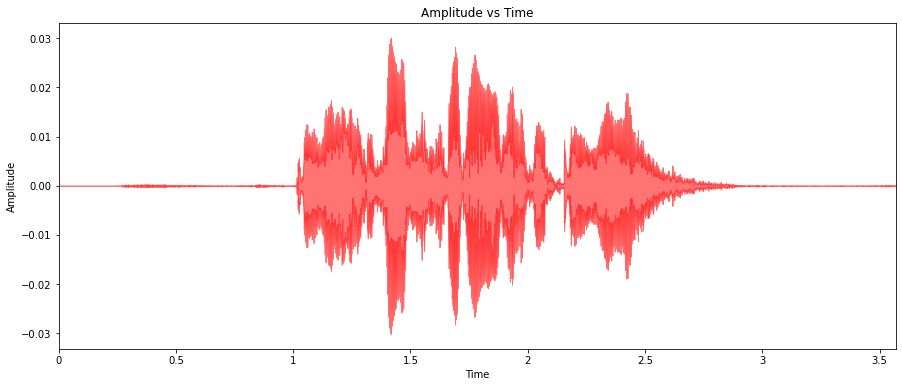

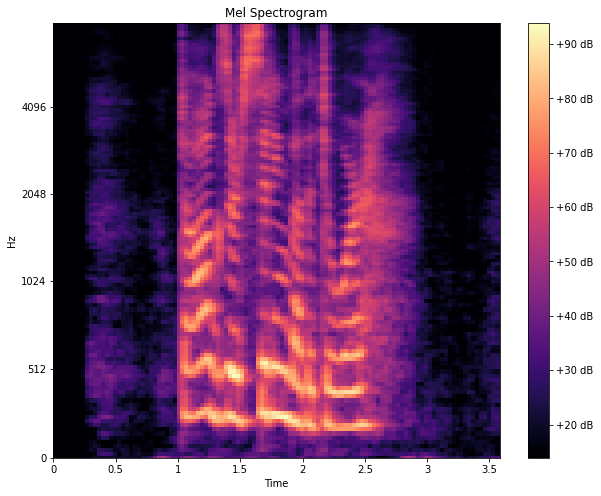

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


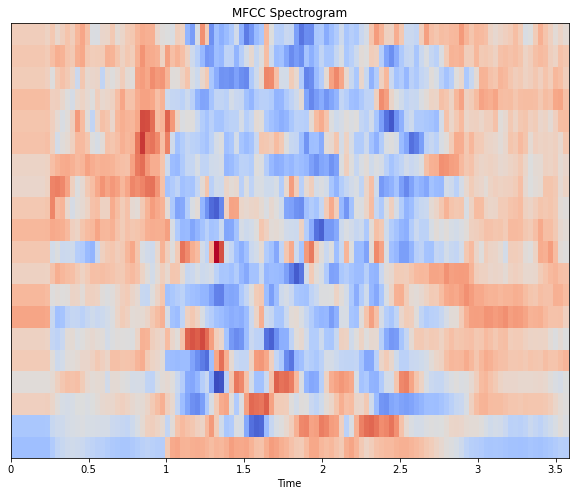

In [52]:
calm_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_04/03-01-02-01-02-02-04.wav"
plot_all(calm_song)

### **Ploting Waveplots for "HAPPY" emotion signal**

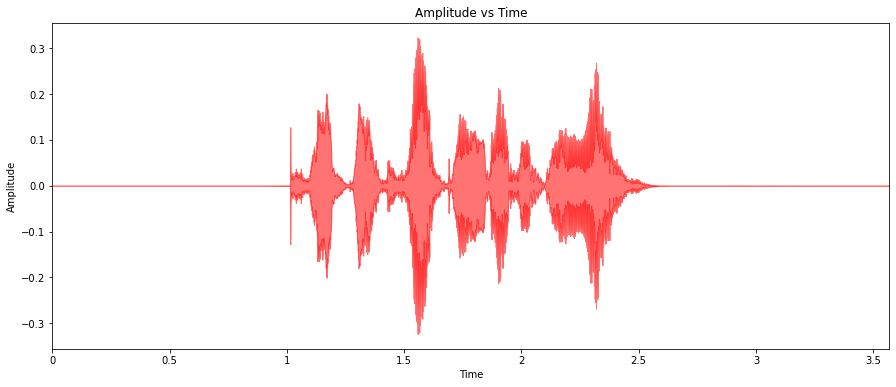

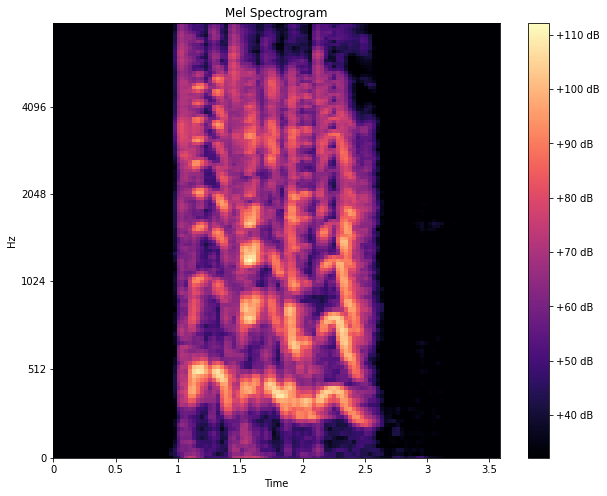

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


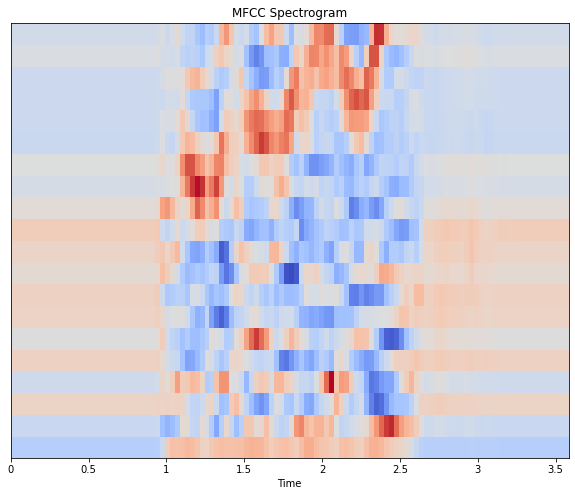

In [53]:
happy_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_04/03-01-03-02-01-02-04.wav"
plot_all(happy_song)

### **Ploting Waveplots for "SAD" emotion signal**

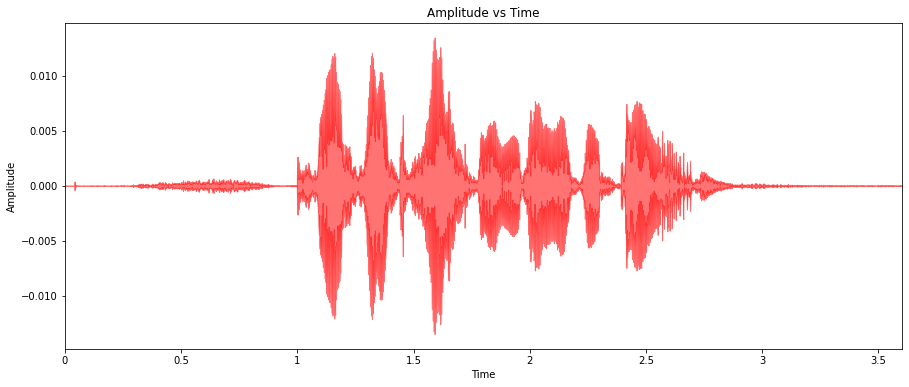

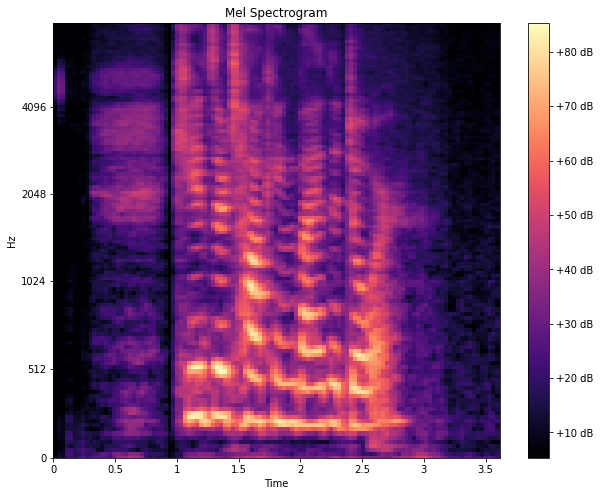

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


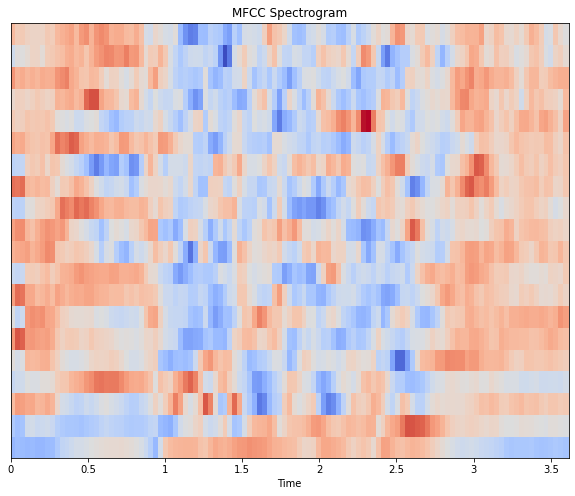

In [54]:
sad_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_06/03-01-04-01-01-02-06.wav"
plot_all(sad_song)

### **Ploting Waveplots for "ANGRY" emotion signal**

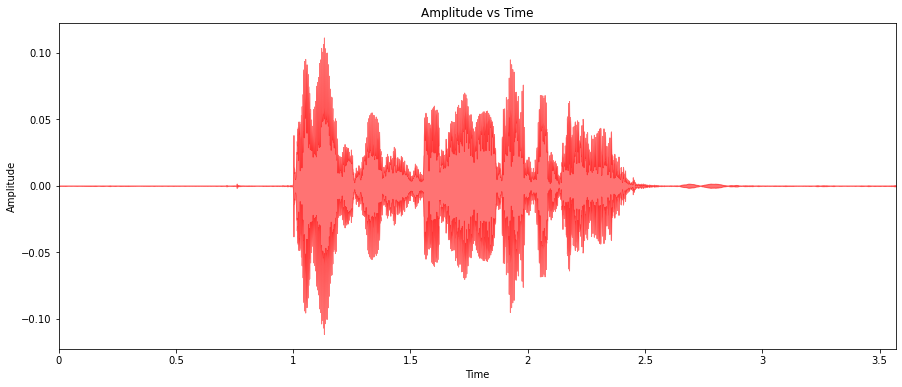

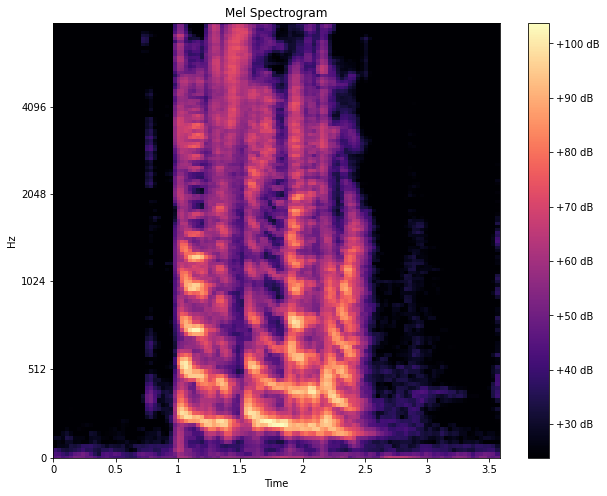

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


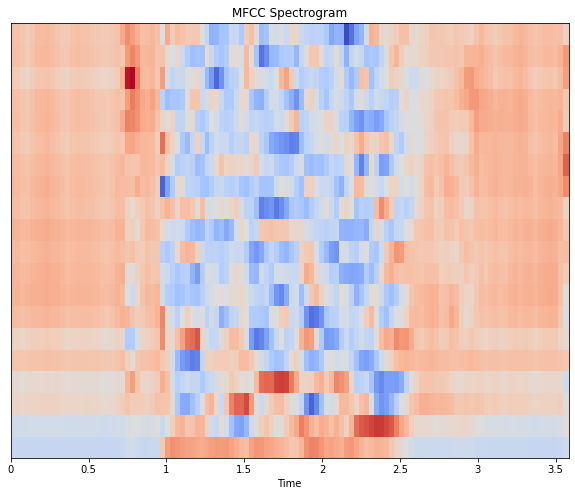

In [55]:
angry_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_08/03-01-05-01-02-02-08.wav"
plot_all(angry_song)

### **Ploting Waveplots for "FEARFUL" emotion signal**

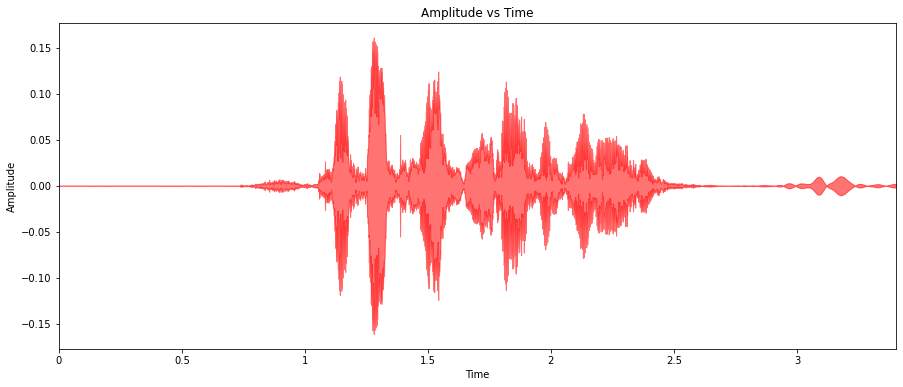

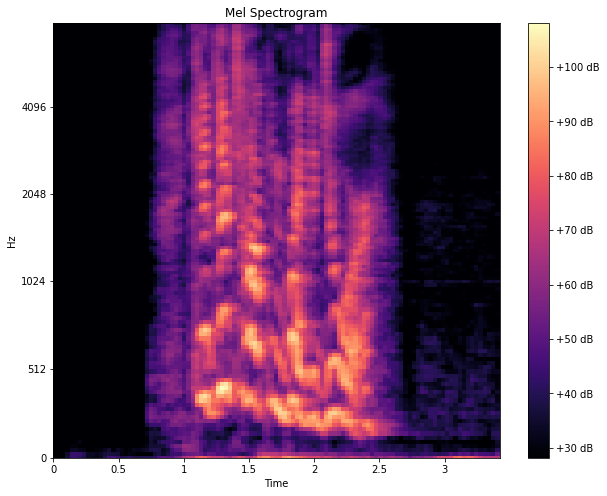

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


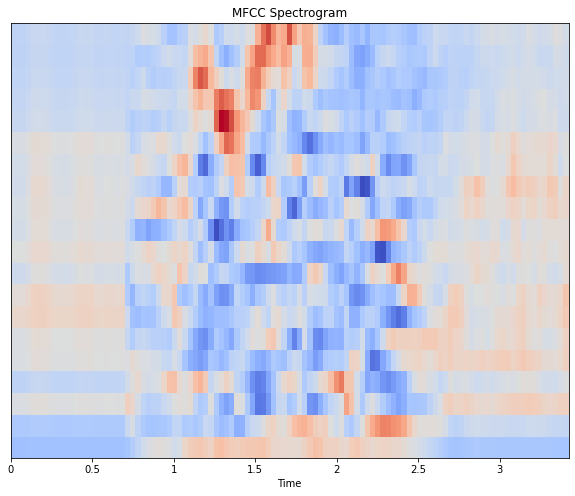

In [56]:
fearful_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_12/03-01-06-01-01-01-12.wav"
plot_all(fearful_song)

### **Ploting Waveplots for "DISGUST" emotion signal**

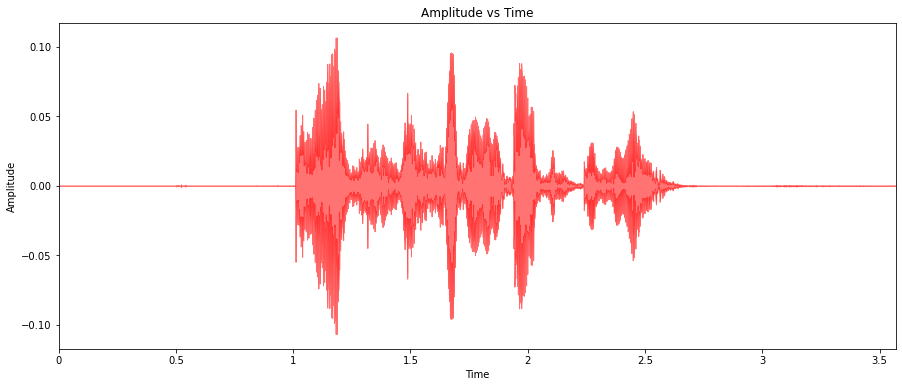

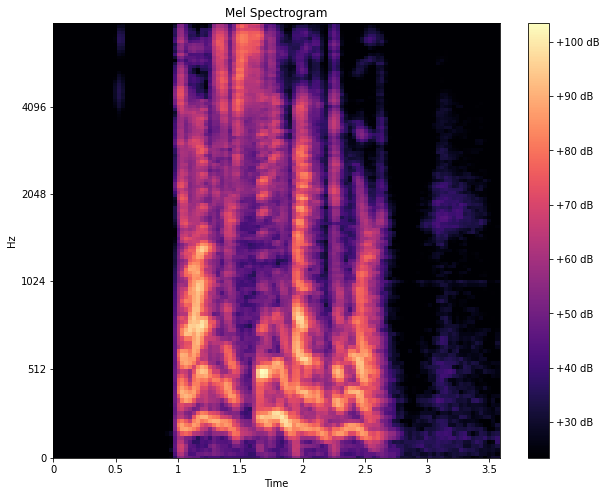

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


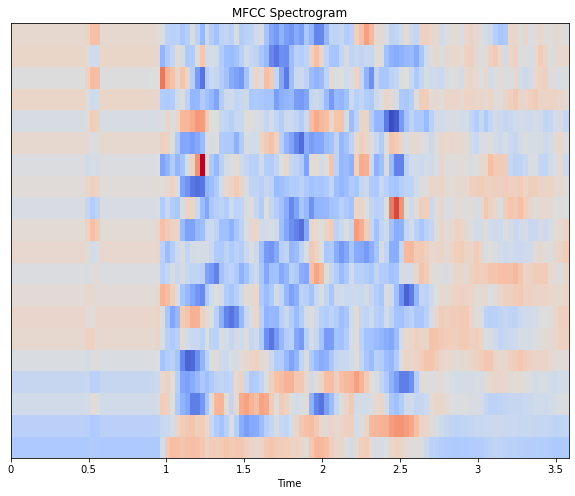

In [57]:
disgust_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_16/03-01-07-01-02-02-16.wav"
plot_all(disgust_song)

### **Ploting Waveplots for "SURPRISED" emotion signal**

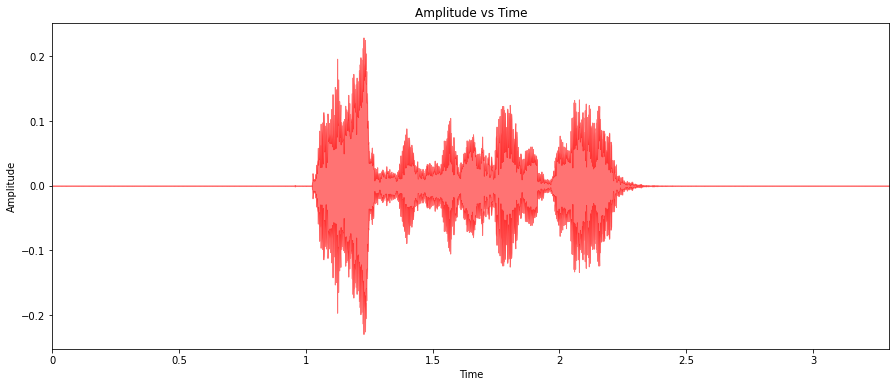

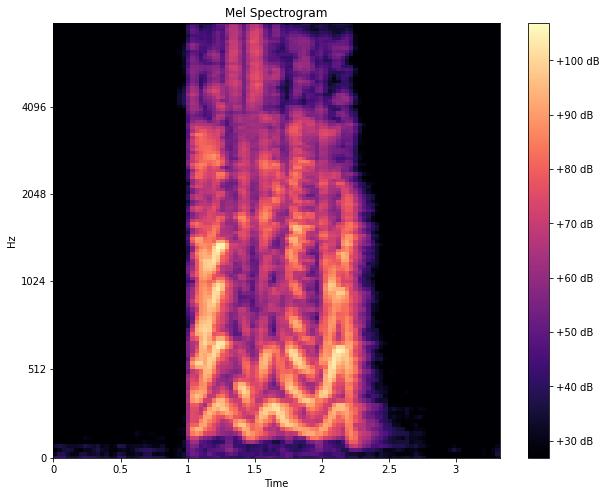

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


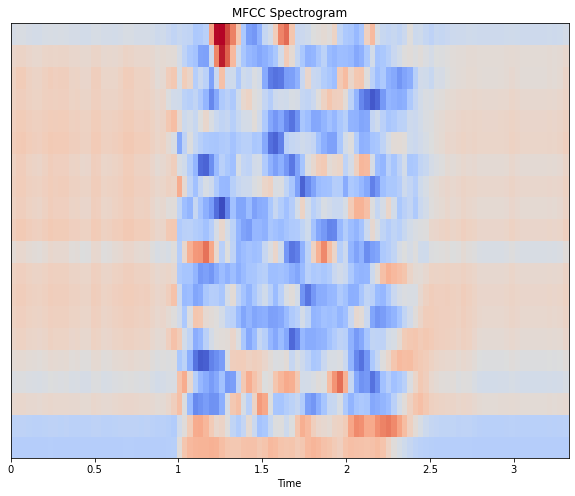

In [58]:
surprised_song = r"/content/drive/MyDrive/ravdess-data-SER/Actor_23/03-01-08-01-02-02-23.wav"
plot_all(surprised_song)

# **Data Preparation**

In this section we'll prepare data for model training. There are 2 things we'll do in this section :
- Prepare the ground truth (one-hot encoding ground truths)
- Prepare the input data (converting raw audio to MFCC's)

## **Preparing ground truths (one-hot encoding)**

In [59]:
# printing current ground truths
df = df[["filepath","emotion"]]
df

,filepath,emotion
0,/content/drive/MyDrive/ravdess-data-SER/Actor_...,1
1,/content/drive/MyDrive/ravdess-data-SER/Actor_...,2
2,/content/drive/MyDrive/ravdess-data-SER/Actor_...,5
3,/content/drive/MyDrive/ravdess-data-SER/Actor_...,4
4,/content/drive/MyDrive/ravdess-data-SER/Actor_...,4
...,...,...
1435,/content/drive/MyDrive/ravdess-data-SER/Actor_...,7
1436,/content/drive/MyDrive/ravdess-data-SER/Actor_...,8
1437,/content/drive/MyDrive/ravdess-data-SER/Actor_...,3
1438,/content/drive/MyDrive/ravdess-data-SER/Actor_...,6


In [60]:
df_emotion = df["emotion"]

# one-hot encoding the labels
y_encoded = []
for emotion in df_emotion.values:
  i = [0,0,0,0,0,0,0,0]
  i[int(emotion)-1]=1
  y_encoded.append(i)

y = y_encoded
y

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 

## **Preparing Input Data (converting raw audio to MFCC's)**

In [61]:
# Takes audio file name/path & returns its Mel Spectrogram.
def convert_audio2MelSpec(audio_file):
    samples, sample_rate = librosa.load(audio_file, sr=None)
    spectrogram = librosa.stft(samples)
    sgram_mag, _ = librosa.magphase(spectrogram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_spectrogram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    return mel_spectrogram


# Takes 2D array & desired_shape then pads it with 0 to reshape it to desired shape.
def apply_padding(an_array,desired_shape):
    shape = np.shape(an_array)
    # we'll reshape all mel_spec to largest shape present in our dataset-(128, 1501)
    padded_array = np.zeros(desired_shape)
    padded_array[:shape[0],:shape[1]] = an_array
    return padded_array

### **Before we convert our raw audio data to 'fixed-sized' MFCC's ,we need to find the audio whose MFCC is the largest,so that we can then bring all the MFCC's to the same dimension through zero-padding.**

In [62]:
# printing shapes of some Mel-spectrograms

i = 0
for file in df["filepath"].values:
  melspec = convert_audio2MelSpec(file)
  print(melspec.shape)
  i+=1  

  if i%25==0:
    break



(128, 125)
(128, 131)
(128, 137)
(128, 130)
(128, 135)
(128, 127)
(128, 115)
(128, 120)
(128, 128)
(128, 113)
(128, 109)
(128, 126)
(128, 118)
(128, 130)
(128, 129)
(128, 124)
(128, 126)
(128, 128)
(128, 109)
(128, 111)
(128, 119)
(128, 114)
(128, 124)
(128, 140)
(128, 133)


In [63]:
# Since we are converting audio to mel spectrogram,the no. of rows is common in all i.e 128
# so we just need to find the largest no. of columns.
largest_shape = [128,0]

i = 0
for file in df["filepath"].values:
  melspec = convert_audio2MelSpec(file)
  if melspec.shape[1]>largest_shape[1]:
    largest_shape[1] = melspec.shape[1]
    print("Current Largest Shape : ",largest_shape)
  
  i+=1
  if i%100==0:
    percent = round((i/len(df))*100,2)
    print("{} % task completed".format(percent))

print("Final : The largest MFCC shape in our dataset is ",largest_shape)

Current Largest Shape :  [128, 125]
Current Largest Shape :  [128, 131]
Current Largest Shape :  [128, 137]
Current Largest Shape :  [128, 140]
Current Largest Shape :  [128, 144]
Current Largest Shape :  [128, 149]
6.94 % task completed
13.89 % task completed
Current Largest Shape :  [128, 150]
20.83 % task completed
Current Largest Shape :  [128, 155]
Current Largest Shape :  [128, 165]
27.78 % task completed
34.72 % task completed
41.67 % task completed
48.61 % task completed
55.56 % task completed
62.5 % task completed
69.44 % task completed
76.39 % task completed
83.33 % task completed
90.28 % task completed
97.22 % task completed
Final : The largest MFCC shape in our dataset is  [128, 165]


## **Now we'll create our x inputs to the model. We'll also "Normalize" the data.**

In [65]:
# Now that we know the largest MFCC shape,we'll pad all the MFCC's to that shape.

from sklearn.preprocessing import MinMaxScaler

x = []

i = 0
for file in df["filepath"].values:
  # convert audio to melspec
  melspec = convert_audio2MelSpec(file)
  # padding to largest shape in dataset
  melspec = apply_padding(melspec, largest_shape)

  # normalising the data
  scaler = MinMaxScaler()
  melspec = scaler.fit_transform(melspec)

  # converting 2D numpy array to 2D list
  melspec = melspec.tolist()
  x.append(melspec)
  
  i+=1
  if i%100==0:
    percent = round((i/len(df))*100,2)
    print("{} % task completed".format(percent))


x = np.array(x)
print(x.shape)
x[:5]

6.94 % task completed
13.89 % task completed
20.83 % task completed
27.78 % task completed
34.72 % task completed
41.67 % task completed
48.61 % task completed
55.56 % task completed
62.5 % task completed
69.44 % task completed
76.39 % task completed
83.33 % task completed
90.28 % task completed
97.22 % task completed
(1440, 128, 165)


array([[[1.        , 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.82221892, 0.78424329, 0.98087731, ..., 0.        ,
         0.        , 0.        ],
        [0.54776335, 0.3412622 , 0.365821  , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[1.        , 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.54292338, 0.85329422, 0.93053716, ..., 0.        ,
         0.        , 0.        ],
        [0.77495292, 0.68546148, 0.64297987, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [66]:
# Finally lets reshape it to Keras's required format : [num_samples,width,height,channels]
x = x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
x.shape

(1440, 128, 165, 1)

## **Data Splitting**
Now that we have prepared our data for model training,we'll now split the data. We'll follow a 85:15 ratio where we use 85% data for training and rest all for testing.

**NOTE** : The main reason we are choosing only 15% of data for testing is so that our training & testing is representative to each other and our model avoid overfitting.

In [67]:
from sklearn.model_selection import train_test_split

y = np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1224
216
1224
216


## **Model Training**

In this section we'll build and train a Deep Convolutional Neural Network to optimally classify our inputs.

In [68]:
x.shape

(1440, 128, 165, 1)

In [69]:
# importing required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Dropout,Flatten


input_shape = (x.shape[1],x.shape[2],x.shape[3])

# Defining the model
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),padding="same",activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(strides=3))
model.add(Conv2D(64,kernel_size=(5,5),padding="same",activation="relu"))
model.add(MaxPooling2D(strides=3))
model.add(Conv2D(128,kernel_size=(5,5),padding="same",activation="relu"))
model.add(MaxPooling2D(strides=3))
model.add(Flatten())
model.add(Dense(150,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(75,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(y_train[0]),activation="softmax"))


# print model summary
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 165, 32)      832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 43, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 43, 55, 64)        51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 18, 128)       204928    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 6, 128)       

In [70]:
# compile the model


model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [71]:
from tensorflow.keras.callbacks import Callback

# Custom callback to stop training when certain accuracy is achieved.
class MyThresholdCallback(Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True


# start training the model 
history = model.fit(x_train, y_train, epochs=100,callbacks=[MyThresholdCallback(0.9)],batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 95ms/step - loss: 2.0657 - accuracy: 0.1348 - val_loss: 2.0178 - val_accuracy: 0.2130
Epoch 2/100
20/20 [==============================] - 1s 59ms/step - loss: 1.9968 - accuracy: 0.2059 - val_loss: 1.9369 - val_accuracy: 0.2778
Epoch 3/100
20/20 [==============================] - 1s 63ms/step - loss: 1.9009 - accuracy: 0.2614 - val_loss: 1.8111 - val_accuracy: 0.3380
Epoch 4/100
20/20 [==============================] - 1s 59ms/step - loss: 1.7884 - accuracy: 0.2892 - val_loss: 1.6830 - val_accuracy: 0.3704
Epoch 5/100
20/20 [==============================] - 1s 57ms/step - loss: 1.7029 - accuracy: 0.3431 - val_loss: 1.5993 - val_accuracy: 0.4074
Epoch 6/100
20/20 [==============================] - 1s 57ms/step - loss: 1.5941 - accuracy: 0.4036 - val_loss: 1.5054 - val_accuracy: 0.4306
Epoch 7/100
20/20 [==============================] - 1s 61ms/step - loss: 1.4642 - accuracy: 0.4453 - val_loss: 1.3610 - val_accuracy: 0.5185
Epoch 

## **Model Evaluation**

In [75]:
accuracy1 = model.evaluate(x_train,y_train)
accuracy2 = model.evaluate(x_test,y_test)

print(" ")
print("Accuracy on Train dataset : ",accuracy1[1])
print("Accuracy on Test dataset : ",accuracy2[1])

7/7 [==============================] - 0s 15ms/step - loss: 2.5941 - accuracy: 0.6389
 
Accuracy on Train dataset :  1.0
Accuracy on Test dataset :  0.6388888955116272


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


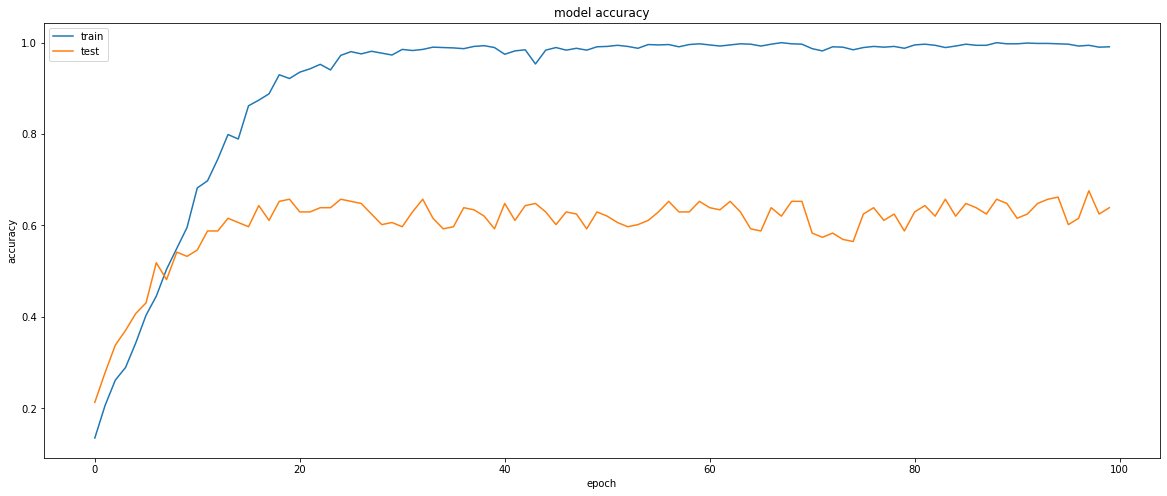

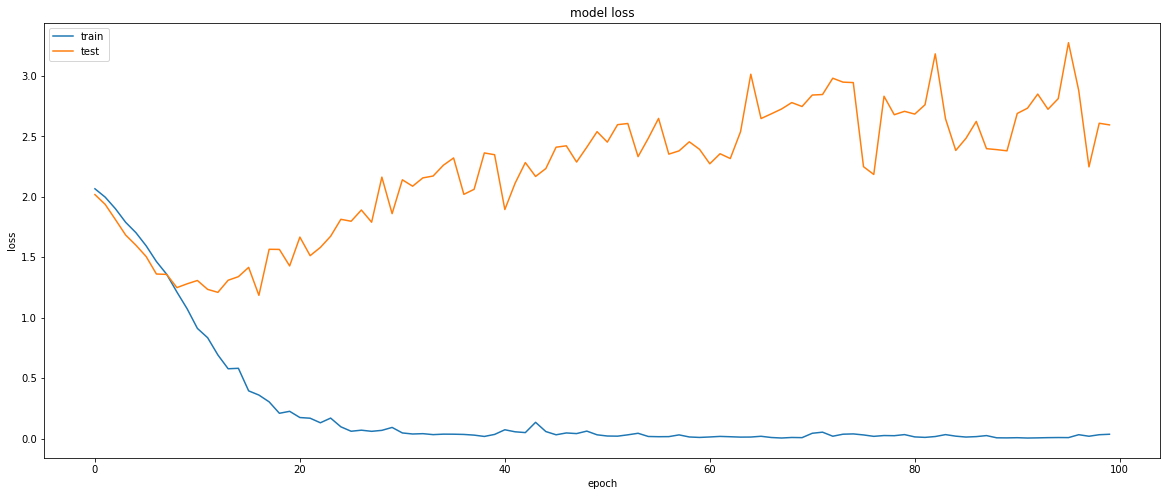

In [72]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Save trained model**

In [85]:
# Save Model Weights and Architecture Together
model.save("SER_model.h5")

## **Run Inference**

In [108]:
from tensorflow.keras.models import load_model

# list of all emotions
emotions_list = ["neutral","calm","happy","sad","angry","fearful","disgust","surprised"]


# Takes audio file and converts to appropriate 
# input for the model
def convert_input(file):
  # convert audio to melspec
  melspec = convert_audio2MelSpec(file)
  # padding to largest shape in dataset
  melspec = apply_padding(melspec, largest_shape)
  # normalising the data
  scaler = MinMaxScaler()
  melspec = scaler.fit_transform(melspec)
  # reshape to 4d
  melspec = melspec.reshape(1,melspec.shape[0],melspec.shape[1],1)
  # converting 2D numpy array to 2D list
  melspec = melspec.tolist()
  return melspec


n = 44

# load the saved model
model = load_model("SER_model.h5")

# process input
audio_path = df["filepath"].values[n]
audio = convert_input(audio_path)

# predict emotion
predicted_emotion = model.predict(audio)

print("Actual : ",df["emotion"].values[n])
print("Predicted : ",np.around(predicted_emotion[0],decimals=3))
print(" ")
print("Actual Emotion : ",emotions_list[int(df["emotion"].values[n])-1])
print("Predicted Emotion : ",emotions_list[np.argmax(predicted_emotion[0])])

Actual :  7
Predicted :  [0. 0. 0. 0. 0. 0. 1. 0.]
 
Actual Emotion :  disgust
Predicted Emotion :  disgust
